# Visualize data quality of stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
from stock_lib import read_stk_data, read_yaml,update_stk_sql

Using TensorFlow backend.


In [4]:
import sqlite3 as lite

In [5]:
stk_list = read_yaml('../configs/stocks.yml')
stk_list.append('NIFTY_50')

db_file = "../data/stock_data.db"

In [6]:
conn = lite.connect(db_file)
cur = conn.cursor()

In [7]:
l = []

for stk in stk_list:
    try:
        df = pd.read_sql_query('select * from '+stk,conn, index_col='Date')
        l.append([stk,len(df),df.shape[1],df.index[0],df.index[-1]])
    except:
        print("Error :"+stk)

Error :MM
Error :HCL_TECH


In [8]:
df_summary = pd.DataFrame(l,columns=['symbol','records','columns','start_date','end_date'])

In [9]:
df_summary.sort_values(by='records')
# sns.jointplot(x='start_date',y='records',data=df_summary)

,symbol,records,columns,start_date,end_date
57,DMART,513,14,2017-03-21,2019-04-12
49,FRETAIL,631,14,2016-09-14,2019-04-12
51,RBLBANK,649,14,2016-08-31,2019-04-12
47,INDIGO,848,14,2015-11-10,2019-04-12
43,COALINDIA,2096,14,2010-11-04,2019-04-12
20,JUBLFOOD,2283,14,2010-02-08,2019-04-12
33,NESTLEIND,2304,14,2010-01-08,2019-04-12
17,WABCOINDIA,2607,14,2008-10-01,2019-04-12
24,COLPAL,2806,14,2007-12-17,2019-04-12
22,POWERGRID,2857,14,2007-10-05,2019-04-12


In [10]:
from datetime import date
from nsepy import get_history

In [11]:
st_date = date(2019,4,1)
end_date = date(2019,4,6)

In [ ]:
get_history(symbol='NIFTY_50', start=st_date, end=end_date,index=True)

# Plot the candles using plotly

In [ ]:
import plotly
plotly.__version__

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
#plotly.tools.set_credentials_file(username='akarthik', api_key='XWpZWL4wuzcN2jScPuOM')


In [ ]:
df = pd.read_sql_query('select * from '+'HDFC',conn, index_col='Date')

In [ ]:
df = df[df.index>'2017-01-01']
df.columns

In [ ]:
trace = go.Ohlc(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
data = [trace]
py.iplot(data, filename='simple_candlestick')

# Bollinger the 2 sigma limits for pct change

In [15]:
df = pd.read_sql_query('select Date,Close from '+'HDFC',conn, index_col='Date')

In [25]:
df['pct_change']=df['Close'].pct_change(1)
df['sigma']=df['pct_change'].rolling(100).std()

df[df['pct_change'].apply(np.abs)>2*df['sigma']]

,Close,pct_change,sigma
Date,,,
2003-06-09,381.50,0.038519,0.017648
2003-06-13,387.10,0.052904,0.018504
2003-07-03,418.10,0.085692,0.021006
2003-08-12,478.75,0.057427,0.022864
2003-08-19,510.55,0.064089,0.024018
2003-08-21,481.40,-0.057741,0.024686
2003-09-24,505.50,0.051482,0.024421
2003-10-06,550.90,0.055364,0.024550
2003-12-24,665.35,0.070900,0.024156


In [ ]:
sns.distplot(df['pct_change'].dropna())

In [ ]:
df[df['pct_change']<-.04].loc[:,['Close','pct_change']]

In [ ]:
df['pct_change'].std()

In [ ]:
df['pct_change'].mean()

In [ ]:
df.iloc[-100:,:]['pct_change'].plot()


In [ ]:
df.iloc[-100:,:]['Close'].plot()

In [ ]:
df.tail()

# View and analyse stock prediction outputs and see the prediction error

In [63]:
df = pd.read_csv('no_features_stocks10.csv')
sum_by = 'correct' 
#sum_by = 'profit'
a = df.groupby("Symbol").sum().sort_values(by=sum_by,ascending=False)
b = df[df['Date']>'2019-01-01'].groupby("Symbol").sum().sort_values(by=sum_by,ascending=False)
c = a.loc[:,[sum_by]].join(b.loc[:,[sum_by]],lsuffix='_a',rsuffix='_b')

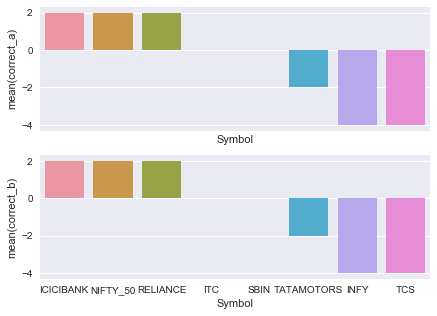

In [64]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
sns.barplot(y=sum_by+'_a',data=c,x=c.index,ax=ax1)
sns.barplot(y=sum_by+'_b',data=c,x=c.index,ax=ax2)

In [65]:
df_no_features = pd.read_csv('no_features_stocks10.csv')
df_ewm = pd.read_csv('stocks10.csv')
df_no_features['error'] = (df_no_features['pred']-df_no_features['y']).apply(np.square)
df_ewm['error'] = (df_ewm['pred']-df_ewm['y']).apply(np.square)

In [66]:
print (df_ewm['error'].sum(),df_no_features['error'].sum())

96882162.77714373 220471.74457096527


In [80]:
a=df_ewm.groupby('Symbol')['error'].sum()

In [81]:
b = df_no_features.groupby('Symbol')['error'].sum()

In [82]:
pd.concat([a,b],axis=1)

,error,error
Symbol,,
ICICIBANK,1.707574e+05,109.411561
INFY,6.841413e+06,8162.320567
ITC,4.985102e+04,1046.843537
NIFTY_50,2.528538e+07,146944.667888
RELIANCE,2.559184e+06,1778.271795
SBIN,9.722014e+04,2633.342953
TATAMOTORS,1.341180e+05,10026.342998
TCS,6.174424e+07,49770.543272
